In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 500

df = pd.read_excel('processed_segmentation.xlsx')

In [4]:
df.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [5]:
### Отделим таргеты

X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

### PCA Анализ

In [6]:
### Центрируем данные

X = X.subtract(X.mean())

X.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,-21.466906,-1.641663,1.149877,0.452529,-0.592836,-0.625434,-0.154467,-0.134565,0.453874,-0.150719,0.395389,-0.017253,-0.144083,0.099973
1,-5.466906,0.000000,0.149877,-0.547471,0.407164,0.374566,0.040094,-0.136878,-0.029322,-0.150719,-0.604611,-0.017253,-0.144083,0.099973
2,23.533094,-1.641663,-1.850123,-0.547471,0.407164,0.374566,0.040094,-0.136878,-0.029322,-0.150719,0.395389,0.003994,0.041298,-0.032710
3,23.533094,-2.641663,-0.850123,0.452529,0.407164,0.374566,0.023319,-0.019455,-0.075653,0.849281,-0.604611,0.003994,0.041298,-0.032710
4,-3.466906,0.000000,3.149877,-0.547471,0.407164,0.374566,0.002584,-0.088221,-0.054556,0.849281,-0.604611,0.003994,0.041298,-0.032710


In [7]:
### Проверка

X.sum()

Age                    9.094947e-12
Work_Experience       -1.122658e-12
Family_Size           -5.826450e-13
Gender_Male           -1.634248e-13
Ever_Married_Yes       1.421085e-14
Graduated_Yes          3.268497e-13
Profession_B          -1.580958e-13
Profession_C          -1.012523e-13
Profession_D          -1.953993e-14
Spending_Score_High    1.740830e-13
Spending_Score_Low     1.953993e-13
Var_1_B               -2.635669e-13
Var_1_C                1.089129e-13
Var_1_D               -4.907186e-14
dtype: float64

In [8]:
### Разложим матрицу Х на 2 главные компоненты

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

,PCA_1,PCA_2
0,-21.432870,-2.458720
1,-5.450097,-0.185937
2,23.612201,-0.704385
3,23.643254,-1.775789
4,-3.518230,-0.315505


In [9]:
### Что содержится в новых признаках?


first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

,PCA_1,PCA_2
Age,0.999976,0.006465
Work_Experience,-0.185781,0.982151
Family_Size,-0.274496,-0.140078
Gender_Male,0.030516,-0.055113
Ever_Married_Yes,0.557175,0.011474
Graduated_Yes,0.235837,0.082300
Profession_B,0.457619,0.080925
Profession_C,0.281130,0.034265
Profession_D,-0.454462,-0.076540
Spending_Score_High,0.360744,0.000941


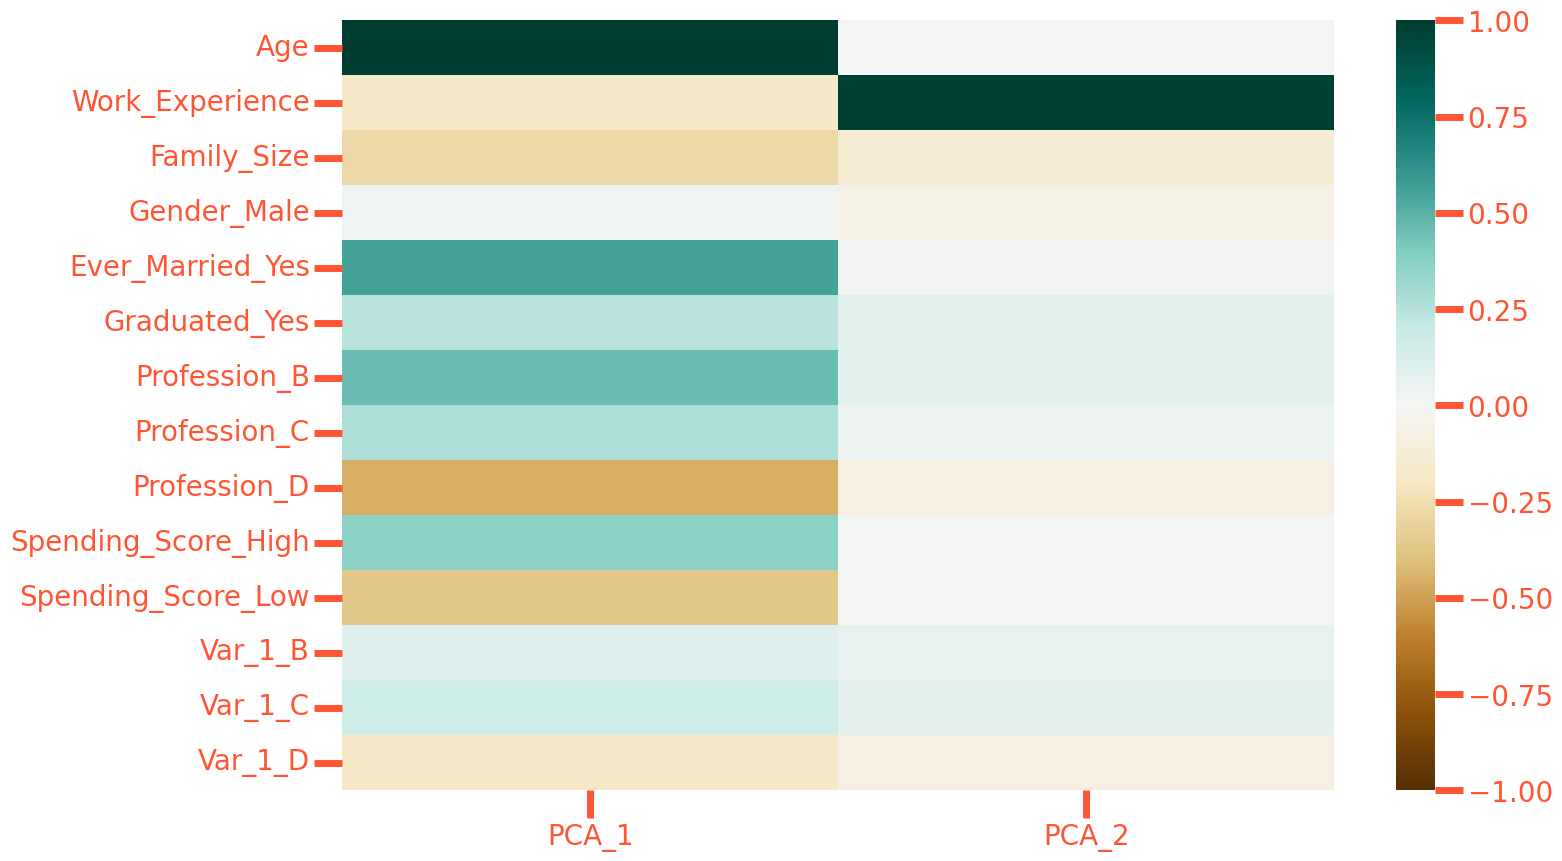

In [10]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [11]:
### Сконкатим с таргетом

PCA_dataset = np.concatenate((PCA_dataset.values, Y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'SEGMENT'])

In [12]:
PCA_dataset

,PCA1,PCA2,SEGMENT
0,-21.43287,-2.45872,D
1,-5.450097,-0.185937,A
2,23.612201,-0.704385,B
3,23.643254,-1.775789,B
4,-3.51823,-0.315505,A
...,...,...,...
8063,-21.465477,-3.649337,D
8064,-8.516026,-0.018887,D
8065,-10.366329,-1.864995,D
8066,-16.432833,-2.267166,B


<Axes: xlabel='PCA1', ylabel='PCA2'>

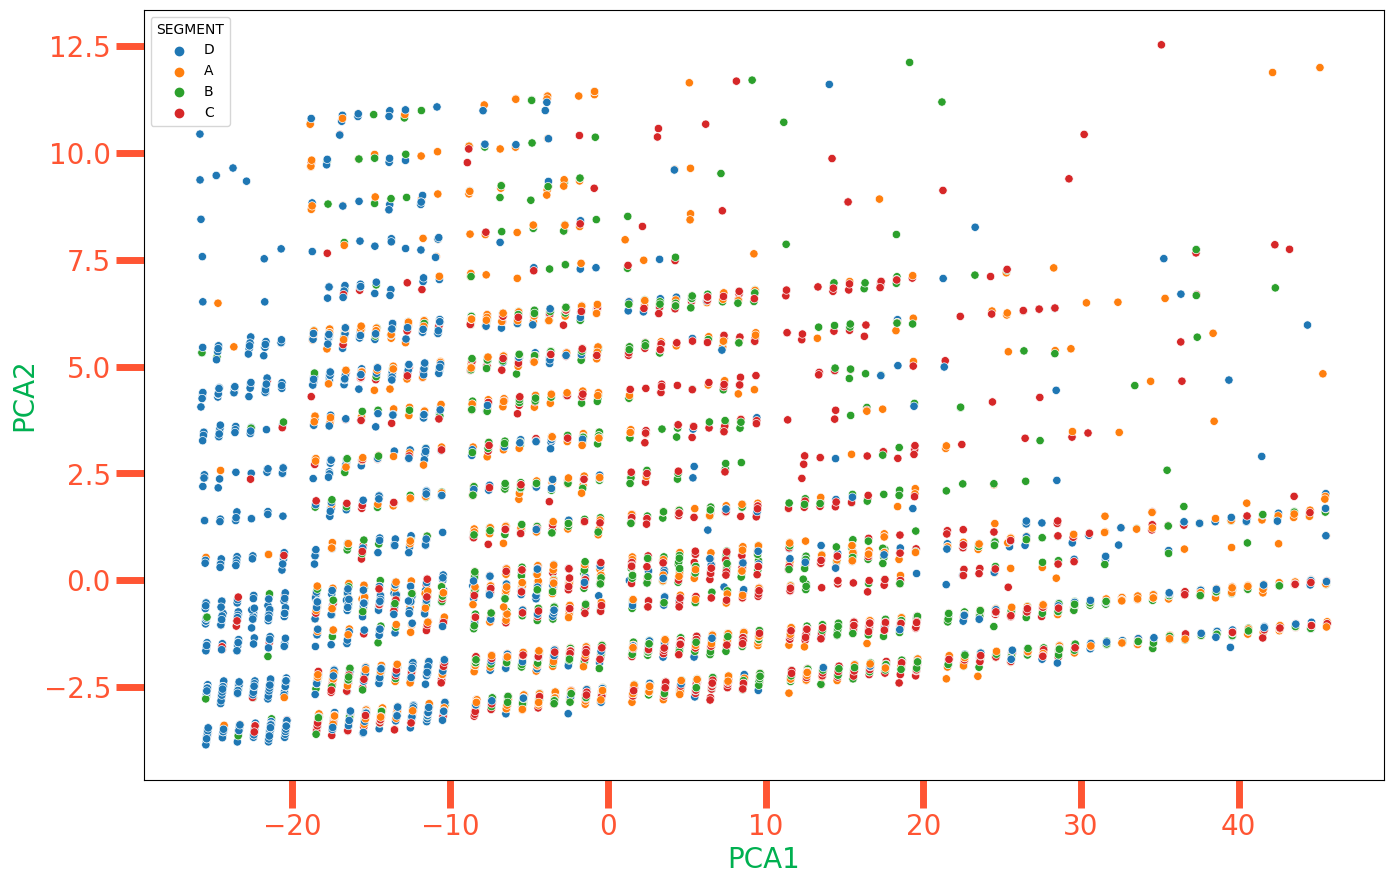

In [13]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="SEGMENT")

In [14]:
### Провернем все то же самое для 3 компонент!

pca_3d = PCA(n_components=3)

pca_3d.fit(X)

PCA_dataset_3d = pca_3d.transform(X)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-21.432870,-2.458720,0.481023
1,-5.450097,-0.185937,0.037264
2,23.612201,-0.704385,-1.401751
3,23.643254,-1.775789,-0.327444
4,-3.518230,-0.315505,3.097162


In [15]:
### Что содержится в новых признаках?

first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Age,0.999976,0.006465,0.002189
Work_Experience,-0.185781,0.982151,0.029322
Family_Size,-0.274496,-0.140078,0.950478
Gender_Male,0.030516,-0.055113,0.069506
Ever_Married_Yes,0.557175,0.011474,0.105692
Graduated_Yes,0.235837,0.082300,-0.170059
Profession_B,0.457619,0.080925,-0.077093
Profession_C,0.281130,0.034265,-0.089120
Profession_D,-0.454462,-0.076540,0.110584
Spending_Score_High,0.360744,0.000941,0.166439


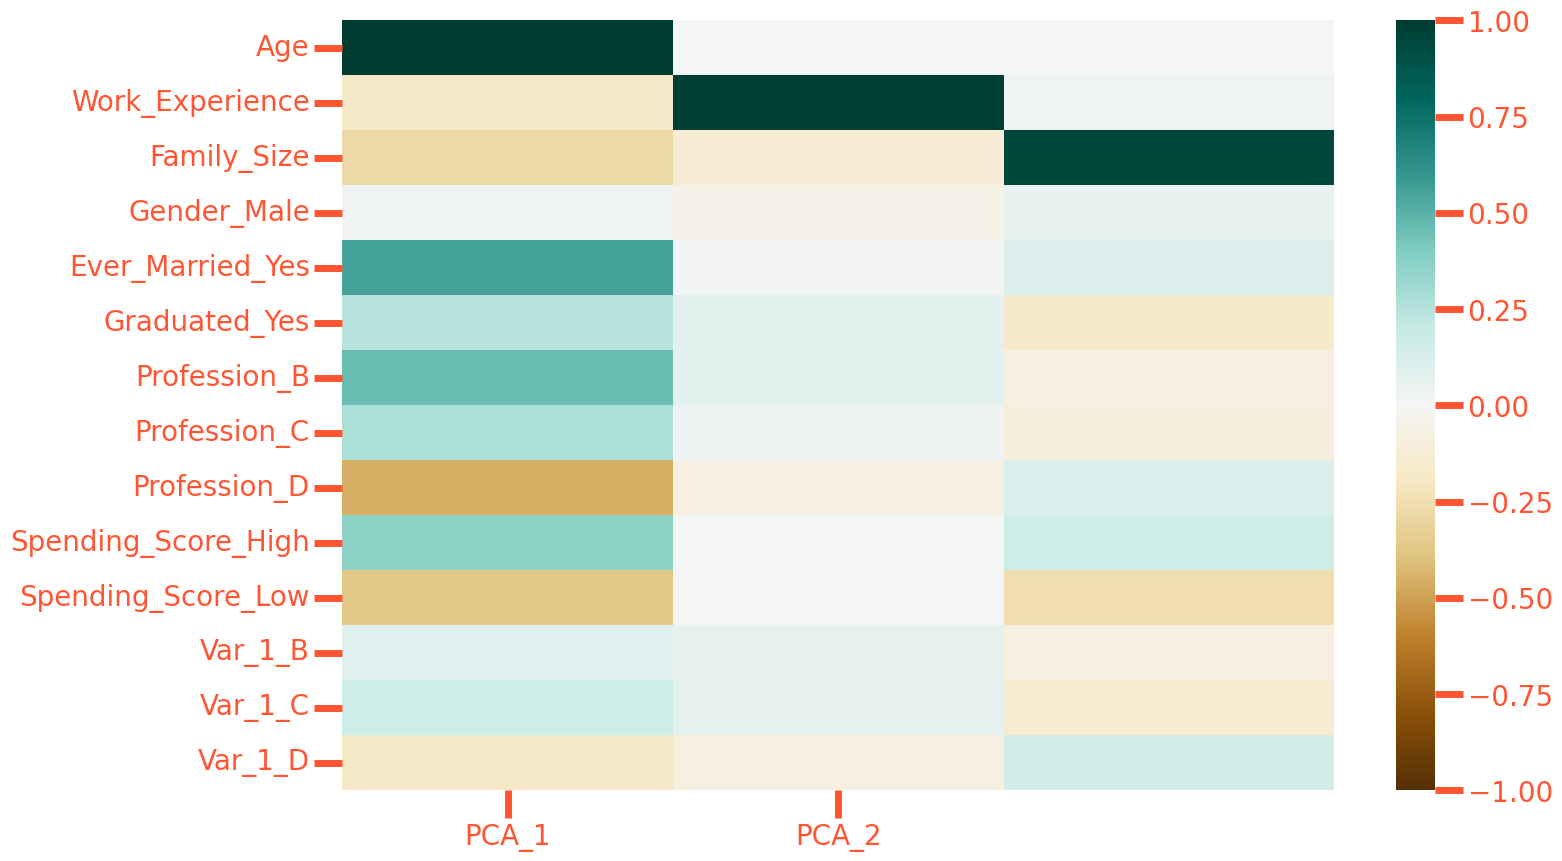

In [16]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [17]:
### Сконкатим с таргетом

PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, Y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'SEGMENT'])

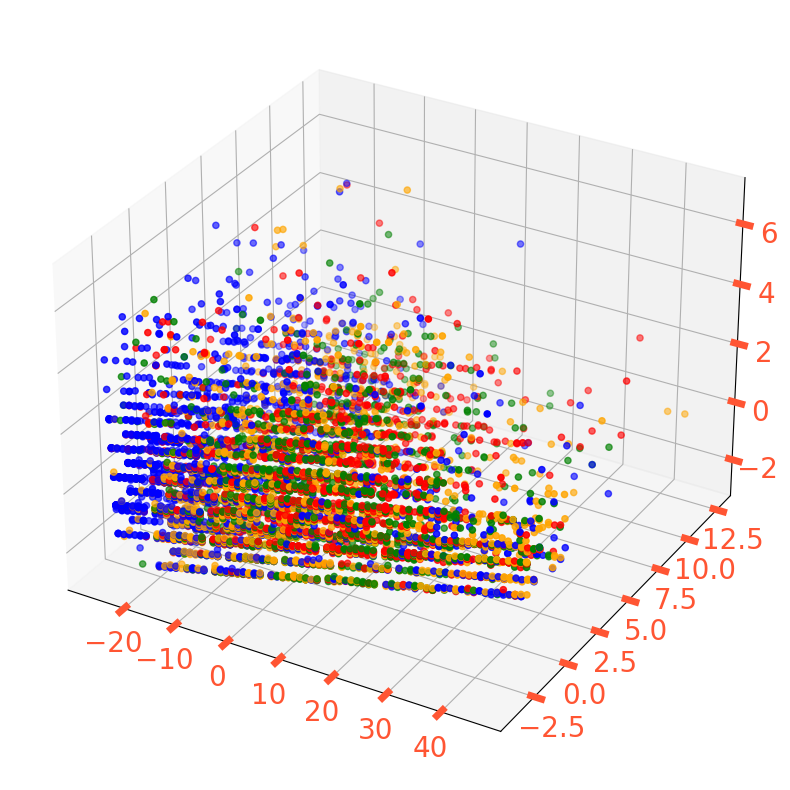

In [18]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

In [19]:
Y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [20]:
### Замерим качество и скорость работы такой модели

from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

import datetime

pipe = Pipeline([('scaler', StandardScaler()),
                 ('classifier', OneVsRestClassifier(SGDClassifier()))])

begin_time = datetime.datetime.now()

pipe.fit(X, Y)

print(datetime.datetime.now() - begin_time)
print(pipe.score(X, Y))

0:00:00.075357
0.44323252354982645


In [21]:
### Замерим качество и скорость работы такой модели

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('one_vs_all', OneVsRestClassifier(SGDClassifier()))])

begin_time = datetime.datetime.now()

pipe.fit(PCA_dataset_3d.drop('SEGMENT', axis=1), Y)

print(datetime.datetime.now() - begin_time)
print(pipe.score(PCA_dataset_3d.drop('SEGMENT', axis=1), Y))

0:00:00.042856
0.37630143777887953


In [22]:
### Замерим качество для разного количества компонент

score_dict = {}
time_dict = {}

for power in range(1, 11):
    
    pca_dataset = PCA(n_components=power).fit_transform(X)
    
    begin_time = datetime.datetime.now()

    pipe.fit(pca_dataset, Y)

    time_dict[power] = (datetime.datetime.now() - begin_time).microseconds
    score_dict[power] = pipe.score(pca_dataset, Y)




In [23]:
score_dict

{1: 0.3477937530986614,
 2: 0.3841100644521567,
 3: 0.37927615270203274,
 4: 0.40047099652949925,
 5: 0.4030738720872583,
 6: 0.423029251363411,
 7: 0.42042637580565195,
 8: 0.4354238968765493,
 9: 0.47297967278135844,
 10: 0.4621963311849281}

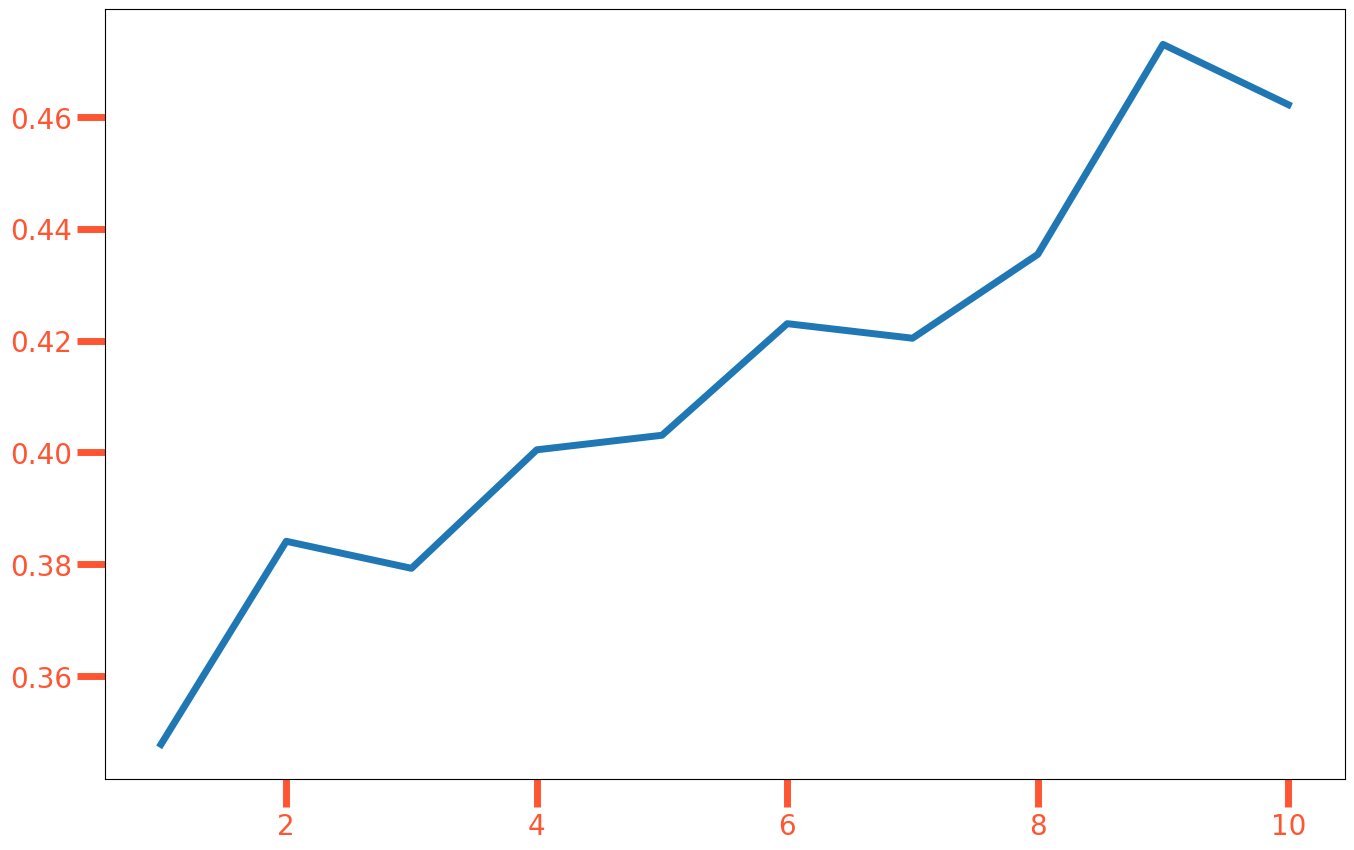

In [24]:
### Изобразим обучающую кривую

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(score_dict.keys()), list(score_dict.values()))

plt.show()


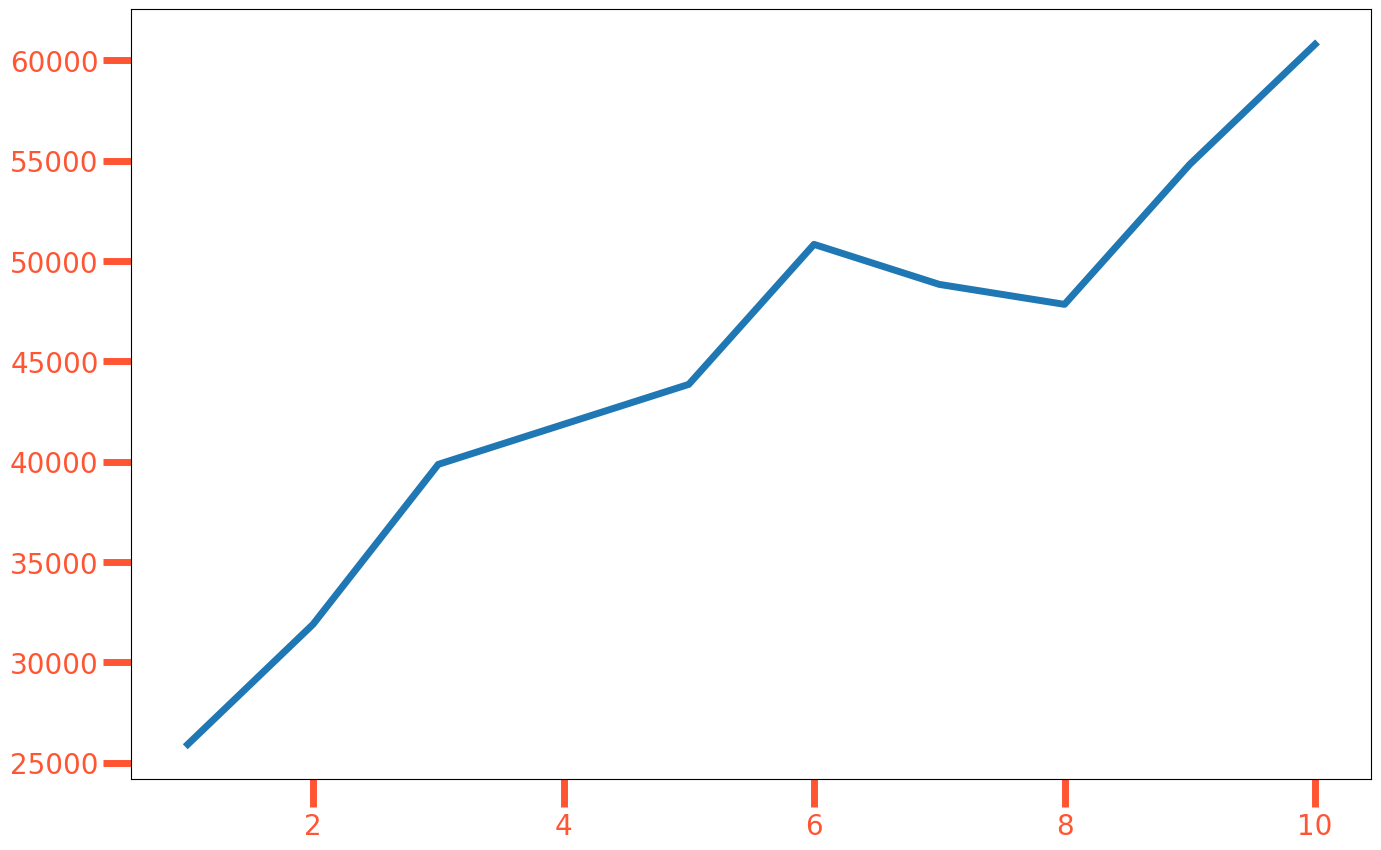

In [25]:
### Изобразим обучающую кривую по времени

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(list(time_dict.keys()), list(time_dict.values()))

plt.show()

### TSNE

In [26]:
### Здесь данные центрировать необходимости нет

X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

In [27]:
### Произведем T-SNE преобразование

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

array([[-85.006966  ,  11.786614  ],
       [ -2.000714  ,  15.779938  ],
       [ 42.2786    ,  10.327858  ],
       ...,
       [-15.18244   , -48.91364   ],
       [-64.685684  , -34.118195  ],
       [-11.093275  ,   0.16203229]], dtype=float32)

In [28]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

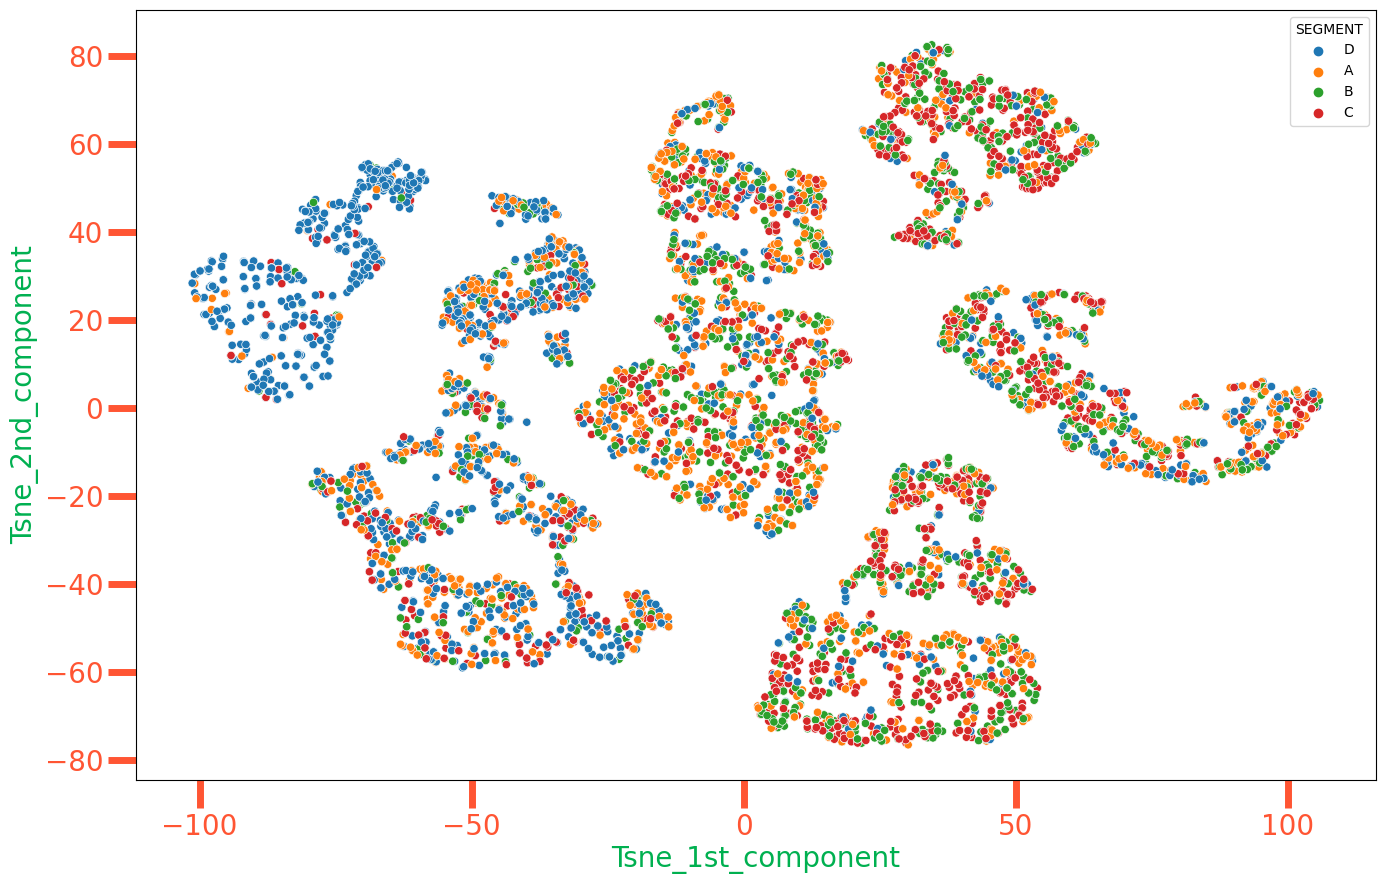

In [29]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")

In [30]:
### Произведем T-SNE преобразование 3D

from sklearn.manifold import TSNE

X_tsne_3d = TSNE(n_components=3).fit_transform(X)

X_tsne_3d

array([[-25.46123   ,  -0.45469943,  -3.7814689 ],
       [ -2.3403792 ,   1.8377805 , -13.106708  ],
       [ 14.919323  ,  -3.7799084 , -17.127354  ],
       ...,
       [ -4.038925  , -13.010371  ,   9.23412   ],
       [-14.795416  , -10.417341  ,   0.11272546],
       [ -8.023073  ,  -3.6614203 , -16.906582  ]], dtype=float32)

In [31]:
### Преобразуем в pd.DataFrame

X_tsne_3d = np.concatenate((X_tsne_3d, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['Tsne_1st_component',
                                             'Tsne_2nd_component',
                                             'Tsne_3rd_component',
                                             'SEGMENT'])

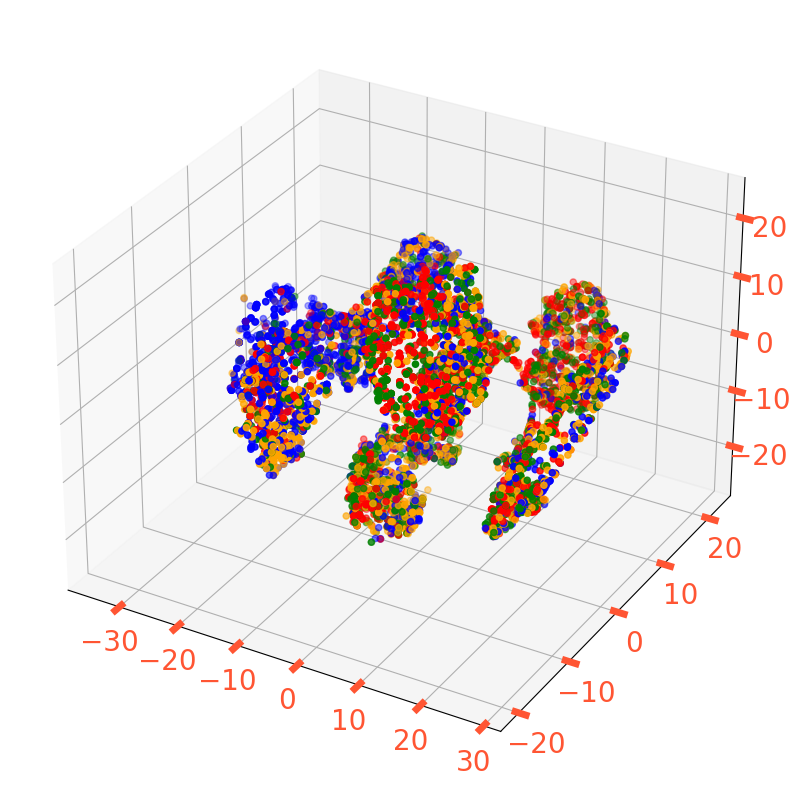

In [32]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                      ['orange', 'green', 'red', 'blue'])

ax.scatter3D(X_tsne_3d['Tsne_1st_component'], 
             X_tsne_3d['Tsne_2nd_component'],
             X_tsne_3d['Tsne_3rd_component'], 
             c=colors)

In [33]:
### Замерим качество и скорость работы такой модели

begin_time = datetime.datetime.now()

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('one_vs_all', OneVsRestClassifier(SGDClassifier()))])

pipe.fit(X_tsne_3d.drop('SEGMENT', axis=1), Y)

print(datetime.datetime.now() - begin_time)
print(pipe.score(X_tsne_3d.drop('SEGMENT', axis=1), Y))

0:00:00.040863
0.3986117997025285
